# TAREFA DATASET KAGGLE


Para esta fase, o objetivo é alcançar o melhor resultado possível com o dataset da competição fornecido pelos docentes na previsão do nível de incidentes rodoviários, numa determinada hora, na cidade de Guimarães.

# TODO:

* Corrigir Redes Neuronais
* Corrigir Blending (vai na versão final?)
* Corrigir SVM

### **1.** Importar as bibliotecas essenciais do Python para a elaboração desta tarefa

In [4]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

### **2.** Carregar o dataset para um dataframe da biblioteca Pandas

In [5]:
df = pd.read_csv('docs/training_data.csv', encoding="utf-8", skipinitialspace=True)
df_teste = pd.read_csv('docs/test_data.csv', encoding="utf-8", skipinitialspace=True)

### **3.** Obtenção de informação acerca do dataset

* **tipos de dados das features**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


* **conteúdo do dataset**

In [7]:
df.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


* **estatística**

In [8]:
df.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


Distribuição da feature target "incidents"

<AxesSubplot:>

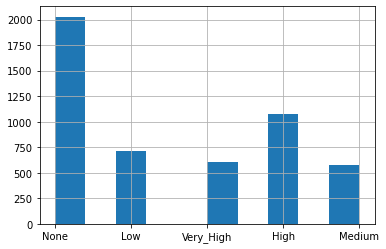

In [9]:
df["incidents"].hist()

Análise dos valores únicos no dataset

In [10]:
for c in df:
    print(f"{c}: {df[c].unique()}")
    print(f"Quantidade: {df[c].nunique()}")
    print("---------------------------------------")

city_name: ['Guimaraes']
Quantidade: 1
---------------------------------------
magnitude_of_delay: ['UNDEFINED' 'MAJOR' 'MODERATE']
Quantidade: 3
---------------------------------------
delay_in_seconds: [   0  385   69 ...  684 8360  896]
Quantidade: 1186
---------------------------------------
affected_roads: [',' 'N101,' 'N101,R206,N105,N101,N101,N101,N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101,' 'N101,N101,N101,N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,N101,'
 'N101,N101,N206,N105,N309,N309,N101,N101,IC5,N101,N101,N105,N101,N206,N101,N101,N101,IC5,N101,N101,N105,N101,N101,N105,N309,N101,N101,N101,N101,IC5,N101,N105'
 'N101,N101,N101,N101,N105,N101,N101' 'N101,N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,' nan 'N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,N206,N105,N101,N101,N105,N105,N101,N101,N101,N101,R206,N101,N101,N105'
 'N101,N101,N206,R206,N206,N101,N105,N206,N309,N101,N101,N101,N101,N101,N105,N206

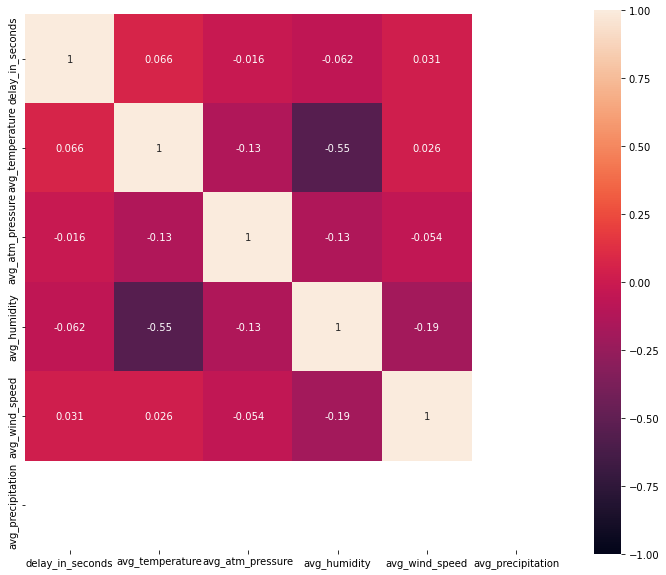

In [11]:
#Correlação entre features
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square = True, annot=True)
plt.draw()

### **4.** Preparação dos dados

In [12]:
df.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [13]:
df.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

**Remoção da feature "avg_humidity"**

In [14]:
#forte correlação com avg_temperature
df = df.drop('avg_humidity', axis=1)
df_teste = df_teste.drop('avg_humidity', axis=1)

**Remoção da feature "avg_precipitation"**

In [15]:
#Possui informação incompleta
df = df.drop('avg_precipitation', axis=1)
df_teste = df_teste.drop('avg_precipitation', axis=1)

**Transformação da coluna *record_date* nas colunas ano, mês, dia, hora e minuto**

In [16]:
df['record_date'] = pd.to_datetime(df['record_date'],format='%Y-%m-%d %H:%M', errors='coerce')
assert df['record_date'].isnull().sum() == 0,'missing record date'

df['record_date_year'] = df['record_date'].dt.year
df['record_date_month'] = df['record_date'].dt.month
df['record_date_day'] = df['record_date'].dt.day
df['record_date_hour'] = df['record_date'].dt.hour
df['record_date_minute'] = df['record_date'].dt.minute
df = df.drop('record_date', axis=1)

df.head()


df_teste['record_date'] = pd.to_datetime(df_teste['record_date'],format='%Y-%m-%d %H:%M', errors='coerce')
assert df_teste['record_date'].isnull().sum() == 0,'missing record date'

df_teste['record_date_year'] = df_teste['record_date'].dt.year
df_teste['record_date_month'] = df_teste['record_date'].dt.month
df_teste['record_date_day'] = df_teste['record_date'].dt.day
df_teste['record_date_hour'] = df_teste['record_date'].dt.hour
df_teste['record_date_minute'] = df_teste['record_date'].dt.minute
df_teste = df_teste.drop('record_date', axis=1)

**Remoção das features "city_name", "record_date_year" e "record_date_minute"**

In [17]:
#como apenas existe um valor para "city_name", esta coluna pode ser removida
df = df.drop('city_name', axis=1)
df_teste = df_teste.drop('city_name', axis=1)

#o mesmo se aplica para o ano e minuto
df = df.drop('record_date_year', axis=1)
df = df.drop('record_date_minute', axis=1)

df_teste = df_teste.drop('record_date_year', axis=1)
df_teste = df_teste.drop('record_date_minute', axis=1)

**Transformação da feature "magnitude_of_delay" em valores numéricos**

In [18]:
df['magnitude_of_delay'].unique()

array(['UNDEFINED', 'MAJOR', 'MODERATE'], dtype=object)

In [19]:
replace_map = {'magnitude_of_delay': {'UNDEFINED':0 ,'MODERATE': 1, 'MAJOR': 2}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour
0,0,0,",",DARK,12.0,1013.0,1.0,Sem Chuva,None,3,15,23
1,0,385,"N101,",DARK,12.0,1007.0,1.0,Sem Chuva,None,12,25,18
2,0,69,",",LIGHT,14.0,1025.0,0.0,Sem Chuva,Low,3,12,15
3,2,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",LIGHT,15.0,1028.0,1.0,Sem Chuva,Very_High,9,29,9
4,0,0,"N101,N101,N101,N101,N101,",LIGHT,27.0,1020.0,1.0,Sem Chuva,High,6,13,11


**Tratamento da feature "affected_roads"**

* Tratamento dos missing values

In [20]:
df['affected_roads'].fillna(',',inplace=True) #tratar de missing values
df_teste['affected_roads'].fillna(',',inplace=True) #tratar de missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   int64  
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      5000 non-null   object 
 3   luminosity          5000 non-null   object 
 4   avg_temperature     5000 non-null   float64
 5   avg_atm_pressure    5000 non-null   float64
 6   avg_wind_speed      5000 non-null   float64
 7   avg_rain            5000 non-null   object 
 8   incidents           5000 non-null   object 
 9   record_date_month   5000 non-null   int64  
 10  record_date_day     5000 non-null   int64  
 11  record_date_hour    5000 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 468.9+ KB


* Separação das ruas e remoção de ruas repetidas

In [21]:
affected_roads = {}

#Separação das ruas e remoção de ruas repetidas
for row in df['affected_roads']:
    roads = list(dict.fromkeys(row.split(',')))
    for road in roads:
        affected_roads[road] = []

for row in df['affected_roads']:
    roads = list(dict.fromkeys(row.split(',')))
    for road in affected_roads:
        if road in roads:
            affected_roads[road].append(1)
        else:
            affected_roads[road].append(0)

        
affected_roads = pd.DataFrame.from_dict(affected_roads)
df = df.drop('affected_roads',axis=1)

for column in affected_roads:
    df[column] = affected_roads[column]
    
#######################################################################
affected_roads = {}

for row in df_teste['affected_roads']:
    roads = list(dict.fromkeys(row.split(',')))
    for road in roads:
        affected_roads[road] = []

for row in df_teste['affected_roads']:
    roads = list(dict.fromkeys(row.split(',')))
    for road in affected_roads:
        if road in roads:
            affected_roads[road].append(1)
        else:
            affected_roads[road].append(0)

        
affected_roads = pd.DataFrame.from_dict(affected_roads)
df_teste = df_teste.drop('affected_roads',axis=1)

for column in affected_roads:
    df_teste[column] = affected_roads[column]
    
df

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,DARK,12.0,1013.0,1.0,Sem Chuva,None,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,DARK,12.0,1007.0,1.0,Sem Chuva,None,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,LIGHT,14.0,1025.0,0.0,Sem Chuva,Low,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,LIGHT,15.0,1028.0,1.0,Sem Chuva,Very_High,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,LIGHT,27.0,1020.0,1.0,Sem Chuva,High,6,13,11,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,DARK,13.0,1021.0,0.0,Sem Chuva,High,4,13,0,1,1,0,0,0,0,0,0,0,0,0
4996,0,0,LIGHT,19.0,1017.0,0.0,Sem Chuva,None,7,6,14,0,1,0,0,0,0,0,0,0,0,0
4997,0,0,DARK,13.0,1023.0,2.0,Sem Chuva,None,3,18,3,1,0,0,0,0,0,0,0,0,0,0
4998,0,0,DARK,12.0,1014.0,2.0,Sem Chuva,None,11,2,6,0,1,0,0,0,0,0,0,0,0,0


**Transformação da feature "luminosity" em valores numéricos**

In [22]:
df['luminosity'].unique()

array(['DARK', 'LIGHT', 'LOW_LIGHT'], dtype=object)

In [23]:
replace_map = {'luminosity': {'LOW_LIGHT':0 ,'LIGHT': 1, 'DARK': 2}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,2,12.0,1013.0,1.0,Sem Chuva,None,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,2,12.0,1007.0,1.0,Sem Chuva,None,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,1,14.0,1025.0,0.0,Sem Chuva,Low,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,1,15.0,1028.0,1.0,Sem Chuva,Very_High,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,1,27.0,1020.0,1.0,Sem Chuva,High,6,13,11,1,1,0,0,0,0,0,0,0,0,0


**Tranformação da feature "avg_rain" em valores numéricos**

In [24]:
df['avg_rain'].unique()

array(['Sem Chuva', 'chuva moderada', 'chuva fraca', 'chuva forte'],
      dtype=object)

In [25]:
replace_map = {'avg_rain': {'Sem Chuva':0 ,'chuva fraca': 1, 'chuva moderada': 2,'chuva forte' : 3}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,2,12.0,1013.0,1.0,0,None,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,2,12.0,1007.0,1.0,0,None,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,1,14.0,1025.0,0.0,0,Low,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,1,15.0,1028.0,1.0,0,Very_High,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,1,27.0,1020.0,1.0,0,High,6,13,11,1,1,0,0,0,0,0,0,0,0,0


**Transformação da feature "incidents" em valores numéricos**

In [26]:
replace_map = {'incidents': {'None':0 ,'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,2,12.0,1013.0,1.0,0,0,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,2,12.0,1007.0,1.0,0,0,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,1,14.0,1025.0,0.0,0,1,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,1,15.0,1028.0,1.0,0,4,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,1,27.0,1020.0,1.0,0,3,6,13,11,1,1,0,0,0,0,0,0,0,0,0


#### Adição de feature "dayOfWeek" e respetiva transformação em valores numéricos

In [27]:
import datetime

def getDayofWeek(df):
    mes = int (df['record_date_month'])
    dia = int (df['record_date_day'])
    intDay = datetime.date(year=2021, month=mes, day=dia).weekday()
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return days[intDay]

df['dayOfWeek'] = df.apply(getDayofWeek, axis=1)
df_teste['dayOfWeek'] = df_teste.apply(getDayofWeek, axis=1)

df.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579,dayOfWeek
0,0,0,2,12.0,1013.0,1.0,0,0,3,15,23,1,0,0,0,0,0,0,0,0,0,0,Monday
1,0,385,2,12.0,1007.0,1.0,0,0,12,25,18,1,1,0,0,0,0,0,0,0,0,0,Saturday
2,0,69,1,14.0,1025.0,0.0,0,1,3,12,15,1,0,0,0,0,0,0,0,0,0,0,Friday
3,2,2297,1,15.0,1028.0,1.0,0,4,9,29,9,0,1,1,1,0,0,0,0,0,0,0,Wednesday
4,0,0,1,27.0,1020.0,1.0,0,3,6,13,11,1,1,0,0,0,0,0,0,0,0,0,Sunday


In [28]:
replace_map = {'dayOfWeek': {'Monday':1 ,'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}}
df.replace(replace_map,inplace=True)
df_teste.replace(replace_map,inplace=True)
df.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579,dayOfWeek
0,0,0,2,12.0,1013.0,1.0,0,0,3,15,23,1,0,0,0,0,0,0,0,0,0,0,1
1,0,385,2,12.0,1007.0,1.0,0,0,12,25,18,1,1,0,0,0,0,0,0,0,0,0,6
2,0,69,1,14.0,1025.0,0.0,0,1,3,12,15,1,0,0,0,0,0,0,0,0,0,0,5
3,2,2297,1,15.0,1028.0,1.0,0,4,9,29,9,0,1,1,1,0,0,0,0,0,0,0,3
4,0,0,1,27.0,1020.0,1.0,0,3,6,13,11,1,1,0,0,0,0,0,0,0,0,0,7


#### 5.1. Decision Tree Classifier

Imports necessários para a implementação deste modelo

In [29]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn import tree

In [30]:
x = df.drop("incidents", axis = 1)

In [31]:
y = df.incidents

In [32]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2022)

Treino do modelo

In [33]:
clf = DecisionTreeClassifier(random_state=2022)
clf = clf.fit(x_train,y_train)

Visualização da árvore de decisão

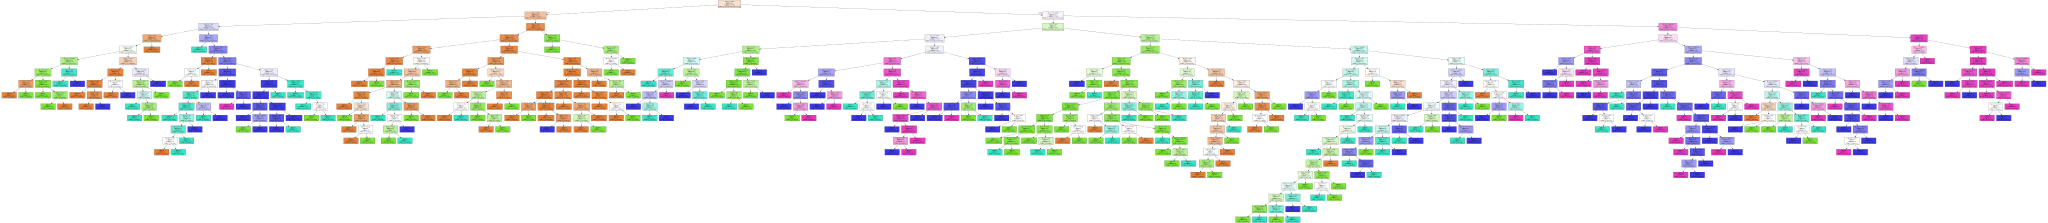

In [34]:
tree.export_graphviz(clf,
                     out_file="tree_dsCompeticao.dot",
                     filled = True)

from graphviz import Source
Source.from_file("tree_dsCompeticao.dot")

Geração de previsões

In [35]:
predictions = clf.predict(x_test)
pd.DataFrame(predictions)

,0
0,1
1,4
2,0
3,0
4,0
...,...
1245,2
1246,4
1247,2
1248,3


In [36]:
y_test

3419    1
178     4
3721    0
3087    0
3685    1
       ..
1266    2
4556    4
1371    2
4911    3
3642    3
Name: incidents, Length: 1250, dtype: int64

Avaliação do modelo

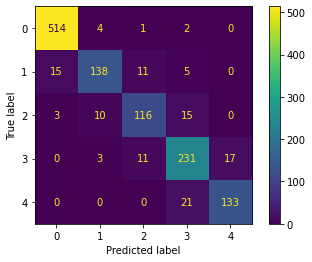

In [37]:
plot_confusion_matrix(clf, x_test, y_test) 

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       521
           1       0.89      0.82      0.85       169
           2       0.83      0.81      0.82       144
           3       0.84      0.88      0.86       262
           4       0.89      0.86      0.88       154

    accuracy                           0.91      1250
   macro avg       0.88      0.87      0.88      1250
weighted avg       0.91      0.91      0.90      1250



In [39]:
mean_absolute_error(y_test,predictions)

0.1072

In [40]:
#Função genérica que irá ser reutilizada para os proximos modelos
def download_submission_file(model, df_teste, filename):
    predictions_dfT = model.predict(df_teste)
    pd.DataFrame(predictions_dfT)
    
    replace_map = {'Incidents': {"0":'None' ,"1":'Low', "2":'Medium', "3":'High', "4":'Very_High'}}
    
    predictions_dfT = pd.DataFrame(predictions_dfT, columns = ["Incidents"])
    predictions_dfT["Incidents"] = predictions_dfT["Incidents"].astype(str)
    predictions_dfT.replace(replace_map,inplace=True)
    predictions_dfT.index.name = 'RowId'
    predictions_dfT.index+=1
    predictions_dfT.head()
    
    from pathlib import Path
    filepath = Path(filename)
    predictions_dfT.to_csv(filepath, index = True)

In [41]:
download_submission_file(clf, df_teste, "submission_files/decisionTree.csv")

#### 5.2 Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [53]:
x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

In [46]:
#Função que escala os dados e separa-os em dados de treino e em dados de teste
def train_scale_data(dataframe_full, dataframe_target):
    scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(dataframe_full)
    scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(dataframe_target)
    x_scaled = pd.DataFrame(scaler_x.transform(dataframe_full[dataframe_full.columns]), columns=dataframe_full.columns)
    y_scaled = pd.DataFrame(scaler_y.transform(dataframe_target[dataframe_target.columns]), columns=dataframe_target.columns)
    x_train, x_test, y_train,y_test = train_test_split(x_scaled,y_scaled,test_size=0.25,random_state=2022)
    return x_train, x_test, y_train,y_test

In [48]:
x_train, x_test, y_train,y_test = train_scale_data(x,y)

In [71]:
lr = LogisticRegression(solver='liblinear', C=10.0, random_state=2022) #solver="newton-cg",

In [88]:
#Função que substitui os valores entre 0 e 1 com a respetiva label de "incidents"
def replace_floats_to_incidents(y_train):
    replace_map = {'incidents': {"0.0":'None' ,"0.25":'Low', "0.5":'Medium', "0.75":'High', "1.0":'Very_High'}}
    y_train = pd.DataFrame(y_train, columns = ["incidents"])
    y_train["incidents"] = y_train["incidents"].astype(str)
    y_train.replace(replace_map,inplace=True)
    y_train.index+=1
    return y_train

In [89]:
y_train = replace_floats_to_incidents(y_train)

In [90]:
lr.fit(x_train,y_train.values.ravel())

LogisticRegression(C=10.0, random_state=2022, solver='liblinear')

In [91]:
download_submission_file(lr, df_teste, "submission_files/logisticRegression.csv")

#### 5.3 Support Vector Machine

In [79]:
x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

In [80]:
x_train, x_test, y_train,y_test = train_scale_data(x,y)

In [99]:
from sklearn.svm import SVC
y_train = replace_floats_to_incidents(y_train)

In [100]:
model = SVC(random_state=2022)
model.fit(x_train,y_train.values.ravel())

SVC(random_state=2022)

In [101]:
download_submission_file(model, df_teste, "submission_files/svm.csv")

#### 5.4 Redes neuronais

In [102]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
#from tensorflow.keras import optimizers
#from sklearn.model_selection import GridSearchCV, KFold, train_test_split
#from sklearn.preprocessing import MinMaxScaler

In [103]:
#x = df.drop('incidents',axis=1)
#y = df[['incidents']]

In [104]:
#x_train, x_test, y_train,y_test = train_scale_data(x,y)

In [109]:
#def build_model(activation = "relu", learning_rate = 0.01):
#    #Create a sequential model (with three layers - last one is the output)
#    model = Sequential()
#    model.add(Dense(16, input_dim = 5, activation = activation))
#    model.add(Dense(8, activation = activation))
#    model.add(Dense(1, activation = activation))
#    
#    #Compile the model
#    #Define the loss function, the otimizer and metrics to be used
#    model.compile(
#        loss = "mae",
#        optimizer = optimizers.Adam(learning_rate),
#        metrics = ["mae", "mse"])
#    return model

In [121]:
#model = build_model()
#model.summary()

In [113]:
#TUNING_DICT = {
#    "activation" :    ["relu", "sigmoid"],
#    "learning_rate" : [0.01, 0.02, 0.03]
#}

In [119]:
#TODO: Corrigir isto
#kf = KFold(n_splits = 5, shuffle = True, random_state = 2022)
#
#model = KerasRegressor(build_fn = build_model, epochs = 100, batch_size = 100)
#grid_search = GridSearchCV(estimator = model,
#                           param_grid = TUNING_DICT,
#                           cv = kf,
#                           scoring = "neg_mean_absolute_error",
#                           refit = "True",
#                           verbose = 1)
#
#grid_search.fit(x_train, y_train, validation_split = 0.2) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/100
Epoch 1/100


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C

Epoch 1/100


ValueError: in user code:

    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\utilizador\anaconda3\envs\daa_env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_177 is incompatible with the layer: expected axis -1 of input shape to have value 5 but received input with shape (100, 22)


In [120]:
#summarize results
#print("Best: %f using %s" %(grid_search.best_score_, grid_search.best_params_))
#means = grid_search.cv_results_["mean_test_score"]
#stds = grid_search.cv_results_["std_test_score"]
#params = grid_search.cv_results_["params"]
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" %(mean, stdev, param))

Best: nan using {'activation': 'relu', 'learning_rate': 0.01}


AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
#Our best model (remember we set refit=True?)
#best_mlp_model = grid_search.best_estimator_

In [ ]:
#from livelossplot import PlotLossesKerasTF

In [ ]:
#best_mlp_model.fit(x_train, y_train, epochs = 20,
#                   validation_data = (x_test, y_test),
#                   callbacks = [PlotLossesKerasTF()], verbose = 1)

In [ ]:
#Obtain predictions
#predictions = best_mlp_model.predict(x_test)
#predictions = predictions.reshape(predictions.shape[0], 1)
#predictions[:5]

In [ ]:
#And now let's unscale the model's predictions to see real prices!
#predictions_unscaled = scaler_y.inverse_transform(y_test)
#predictions_unscaled[:5]

In [ ]:
#Let's unscale y_test to get the original values
#y_test_unscaled = scaler_y.inverse_transform(predictions)
#y_test_unscaled[:5]

In [ ]:
#from sklearn import metrics
#print("MAE:", metrics.mean_absolute_error(y_test, predictions))
#print("MSE:", metrics.mean_squared_error(y_test, predictions))
#print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
#download_submission_file(best_mlp_model, df_teste, "submission_files/redeNeuronal.csv")

### 5.5 Ensemble learning

### 5.5.1 Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

SVM = SVC(random_state=2022, model = SVC(random_state=2022)
model.fit(x_train,y_train.values.ravel()))
xg_reg = xgb.XGBClassifier(objective ='reg:linear', use_label_encoder=False, colsample_bytree = 0.3, eval_metric='mlogloss',
                           learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
rfc = RandomForestClassifier(n_estimators=100, random_state=2022)


estimators = [('svm', SVM), ('xgb', xg_reg), ('rfc', rfc)]
ve = VotingClassifier(estimators, voting = 'soft', weights = [1, 1, 1] )

ve = ve.fit(x_train, y_train)

In [ ]:
download_submission_file(ve, df_teste, "submission_files/voting.csv")

### 5.5.2 Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

x = df.drop(['incidents'], axis=1)
y = df['incidents']
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2022)

n_estimators = [10,40,68, 80, 100, 160]

cv = StratifiedShuffleSplit(n_splits=10, test_size=20, random_state=2022)
parameters={'n_estimators' :n_estimators}

#estimator = None = DecisionTreeClassifier

gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=2022), bootstrap = True),
                  param_grid=parameters, cv=cv)
gs = gs.fit(x_train, y_train)

In [ ]:
download_submission_file(gs, df_teste, "submission_files/bagging.csv")

### 5.5.3 Stacking

In [178]:
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

x_train, x_test, y_train,y_test = train_scale_data(x,y)
y_train = replace_floats_to_incidents(y_train)

boost = xgb.XGBClassifier(random_state=2022, verbosity=0, use_label_encoder=False)
forest = RandomForestClassifier(n_estimators=100,random_state=2022)
lgclassifier = LogisticRegression(random_state=2022)

estimators = [
     ('rf', forest),
     ('xgb', boost)
]
sclf = StackingClassifier(estimators=estimators,
                          final_estimator=lgclassifier,
                          cv=10)

sclf.fit(x_train, y_train.values.ravel())


StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(random_state=2022)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_chil

In [177]:
download_submission_file(best_ada, df_teste, "submission_files/stacking.csv")

### 5.5.4 Blending

In [226]:
#from sklearn.ensemble import RandomForestClassifier

#x = df.drop(['incidents'], axis=1)
#y = df['incidents']

In [227]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)
#
#model_1= SVC(gamma="scale",probability=True, random_state=2022)
#model_1.fit(X_train, y_train)
#
#val_pred_1= model_1.predict(X_val)
#test_pred_1= model_1.predict(X_test)
#
#model_2= RandomForestClassifier(random_state=2022)
#model_2.fit(X_train, y_train)
#
#val_pred_2= model_2.predict(X_val)
#test_pred_2= model_2.predict(X_test)
#
##Combining the meta-features and the validation set,
#
##a Logistic regression model is built to make prediction on the test set
#df_val= pd.concat([X_val, val_pred_1, val_pred_2], axis=1)
#df_test= pd.concat([X_test, test_pred_1, test_pred_2], axis=1)
#
#model = LogisticRegression(random_state=2022)
#
#model.fit(df_val, y_val)
#
#download_submission_file(best_ada, df_teste, "submission_files/blending.csv")

### 5.5.5 AdaBoost

In [168]:
from sklearn.ensemble import AdaBoostClassifier

x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

In [169]:
parameters = {'n_estimators': [10,50,100], 
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate': [0.01,0.1,1]
             }

clf = GridSearchCV(estimator=AdaBoostClassifier(random_state=2022), param_grid=parameters, cv=5)
best_ada = clf.fit(x_train, y_train.values.ravel())

In [170]:
download_submission_file(best_ada, df_teste, "submission_files/adaboost.csv")

### 5.5.6 XGBoost

In [163]:
import xgboost as xgb

In [164]:
x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

In [166]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2022)
xg_reg = xgb.XGBClassifier(objective ='reg:linear', use_label_encoder=False, random_state=2022, colsample_bytree = 0.3, eval_metric='mlogloss',
                           learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(x_train, y_train.values.ravel())

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='mlogloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=2022,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False, ...)

In [167]:
download_submission_file(xg_reg, df_teste, "submission_files/xgboost.csv")

### 5.5.7 Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

In [126]:
x = df.drop(['incidents'], axis=1)
y = df[['incidents']]

In [127]:
x_train, x_test, y_train,y_test = train_scale_data(x,y)
y_train = replace_floats_to_incidents(y_train)

In [137]:
rfc = RandomForestClassifier(n_estimators=100, random_state=2022)
rfc.fit(x_train, y_train.values.ravel())

RandomForestClassifier(random_state=2022)

In [138]:
download_submission_file(rfc, df_teste, "submission_files/randomForestClassifier.csv")